In [1]:
reset -fs

This Notebook is the second for my Capstone project. It contains everythin relative to the predective modeling. Starting with setting up pipelines then building different models. The most promising models will be optimized and the results will be visualized

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import modules</a></span></li><li><span><a href="#Macros" data-toc-modified-id="Macros-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Macros</a></span></li><li><span><a href="#Utile-Functions" data-toc-modified-id="Utile-Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Utile Functions</a></span></li></ul></li><li><span><a href="#Predictive-Modeling" data-toc-modified-id="Predictive-Modeling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predictive Modeling</a></span><ul class="toc-item"><li><span><a href="#Initial-Import-of-the-data" data-toc-modified-id="Initial-Import-of-the-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Initial Import of the data</a></span></li><li><span><a href="#Preparation" data-toc-modified-id="Preparation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Building-a-preprocessing-pipeline" data-toc-modified-id="Building-a-preprocessing-pipeline-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Building a preprocessing pipeline</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Baseline-model:-DummyClassifier" data-toc-modified-id="Baseline-model:-DummyClassifier-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Baseline model: DummyClassifier</a></span></li><li><span><a href="#Logistics-Regression" data-toc-modified-id="Logistics-Regression-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Logistics Regression</a></span><ul class="toc-item"><li><span><a href="#with-feature-selection" data-toc-modified-id="with-feature-selection-2.4.2.1"><span class="toc-item-num">2.4.2.1&nbsp;&nbsp;</span>with feature selection</a></span></li></ul></li><li><span><a href="#Overview-of-different-models" data-toc-modified-id="Overview-of-different-models-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Overview of different models</a></span></li><li><span><a href="#Naive-Bayes-Classifier" data-toc-modified-id="Naive-Bayes-Classifier-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Naive Bayes Classifier</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#AdaBoost" data-toc-modified-id="AdaBoost-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>AdaBoost</a></span></li><li><span><a href="#Support-Vector-Classifier" data-toc-modified-id="Support-Vector-Classifier-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Support Vector Classifier</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Neural-Network:-Multilayer-Perceptron-Classifier" data-toc-modified-id="Neural-Network:-Multilayer-Perceptron-Classifier-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Neural Network: Multilayer Perceptron Classifier</a></span></li><li><span><a href="#How-about-imbalanced-data" data-toc-modified-id="How-about-imbalanced-data-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>How about imbalanced data</a></span></li><li><span><a href="#Playing-with-learning-curves" data-toc-modified-id="Playing-with-learning-curves-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Playing with learning curves</a></span></li></ul></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Appendix</a></span><ul class="toc-item"><li><span><a href="#Preparing-Submission" data-toc-modified-id="Preparing-Submission-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Preparing Submission</a></span></li></ul></li></ul></div>

In [2]:
reset -fs

# Setup

In the first step I will load the relevant modules into the notebook, define some macro settings (Folder etc.) and group 

## Import modules

In [3]:
import os
import math
import datetime

# 
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Modeling
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV,RandomizedSearchCV, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.dummy import DummyClassifier

from sklearn.externals import joblib

from sklearn.metrics import roc_curve, confusion_matrix,precision_recall_curve,confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, fbeta_score, roc_auc_score
from sklearn.metrics import plot_precision_recall_curve, plot_confusion_matrix

from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings('ignore')

C:\Users\Torben\anaconda3\envs\nf\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


## Macros

In [4]:
# Setting some genereral data like folgers and random seed 
    DATA_FOLDER = './data/'
    FIG_FOLDER = './figures/'
    MODEL_FOLDER = './models/'
    RSEED = 42

# Changing some default values for plotting 
    plt.style.use('fivethirtyeight')
    plt.rcParams['font.size'] = 14
    plt.rcParams['patch.force_edgecolor'] = True
    sns.set_style("white")
# sns.set_context("talk")

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Utile Functions

In [6]:
# funtion for saving figures
def save_fig(sec_name, fig_name, tight_layout=True,dpi=600):
    path = os.path.join(FIG_FOLDER , sec_name + '_'  + fig_name + ".png")
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=dpi)
    

# function for appending new columns (models) to the evaluation dataframe
def add_eval():
    
    df_evaluation.drop_duplicates(keep=False,inplace=True) 
    pass


In [7]:
# auxillary function for the model evaluation
compare_mod = pd.DataFrame()
def model_eval(m, X_train, X_test, y_train, y_test,name, df=compare_mod,thres=0.5,fbeta=0.5):
    
    y_ins_pred= m.predict(X_train)
    y_outs_pred= m.predict(X_test)
    try:
        y_ins_pred_p= m.predict_proba(X_train)[:, 1]
        y_outs_pred_p= m.predict_proba(X_test)[:, 1]
        if thres!=0.5:

            y_ins_pred = [1. if e > thres else 0. for e in y_ins_pred_p]
            y_outs_pred = [1. if e > thres else 0. for e in y_outs_pred_p]
    except:
        y_ins_pred_p= y_ins_pred
        y_outs_pred_p= y_ins_pred 
        
    df.at['test  recall', name] = recall_score(y_test, y_outs_pred, average='weighted')
    df.at['train recall', name] = recall_score(y_train, y_ins_pred, average='weighted')
    
    df.at['test  precision', name] = precision_score(y_test, y_outs_pred, average='weighted')
    df.at['train precision', name] = precision_score(y_train, y_ins_pred, average='weighted')
    
    df.at['test  f1', name] = f1_score(y_test, y_outs_pred,average='weighted')
    df.at['train f1', name] = f1_score(y_train, y_ins_pred,average='weighted')
    
    df.at[f'test  fb={fbeta}', name] = fbeta_score(y_test, y_outs_pred, fbeta,average='weighted')
    df.at[f'train fb={fbeta}', name] = fbeta_score(y_train, y_ins_pred, fbeta,average='weighted')
    
    df.at['test  accuracy', name] = accuracy_score(y_test, y_outs_pred)
    df.at['train accuracy', name] = accuracy_score(y_train, y_ins_pred)    
    
    print('--')
    print(f'test  recall = {recall_score(y_test, y_outs_pred,average="weighted")}')
    print(f'train recall = {recall_score(y_train, y_ins_pred,average="weighted")}')
    print('--')
    print(f'test  precision = {precision_score(y_test, y_outs_pred,average="weighted")}')
    print(f'train precision = {precision_score(y_train, y_ins_pred,average="weighted")}')
    print('--')
    print(f'test  accuracy = {accuracy_score(y_test, y_outs_pred)}')
    print(f'train accuracy = {accuracy_score(y_train, y_ins_pred)}')
    print('--')  

    print(classification_report(y_test, y_outs_pred))

# Predictive Modeling

## Initial Import of the data

In [8]:
train = pd.read_pickle(DATA_FOLDER + 'train_featured_clean.pkl')
val = pd.read_pickle(DATA_FOLDER + 'val_featured_clean.pkl')
# competition = pd.read_pickle(DATA_FOLDER + 'test_featured_clean.pkl')

## Preparation

In [9]:
# dropped features 
to_drop = ['scheme_name',
 'wpt_name',
 'subvillage',
 'id',
 'recorded_by',
 'payment',
 'quantity_group',
 'quality_group',
 'waterpoint_type_group',
 'extraction_type_group',
 'management_group',
 'source_class',
 'source_type',
 'region_code',
 'ward']

In [10]:
# dropping the features defined as not neccessary in the previos chapters
train.drop(to_drop,1, inplace=True)
val.drop(to_drop,1, inplace=True)

In [11]:
numeric_features = list(train.columns[train.dtypes!=object])
numeric_features.remove('permit')
numeric_features.remove('public_meeting')
numeric_features.remove('district_code')
# numeric_features.remove('num_private')
# numeric_features.remove('date_recorded')
# numeric_features.remove('construction_year')
numeric_features

['amount_tsh',
 'gps_height',
 'longitude',
 'latitude',
 'num_private',
 'population',
 'time_in_operation']

In [12]:
categoric_features = list(train.columns[train.dtypes==object])
categoric_features.remove('status_group')
categoric_features.remove('extraction_type_class')
categoric_features

['funder',
 'installer',
 'basin',
 'region',
 'lga',
 'scheme_management',
 'extraction_type',
 'management',
 'payment_type',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type']

## Building a preprocessing pipeline

In [13]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))]) #,sparse=False

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categoric_features)
    ])

In [14]:
y_train = train.status_group
y_val = val.status_group
X_train = train.drop('status_group',1)
X_val = val.drop('status_group',1)

In [15]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

In [16]:
print('train shape: ', X_train_transformed.shape)
print('validation shape: ',X_val_transformed.shape)

train shape:  (47520, 264)
validation shape:  (11880, 264)


In [17]:
# Feature Selection
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [40]:
pip_feat = Pipeline([
    ('preparation', preprocessor),
    ('feature_selection', TopFeatureSelector(importances, 100))
])

In [36]:
X_train_transformed_feat_select = pip_feat.fit_transform(X_train)

In [37]:
X_train_transformed_feat_select

<47520x25 sparse matrix of type '<class 'numpy.float64'>'
	with 525791 stored elements in Compressed Sparse Row format>

## Modeling


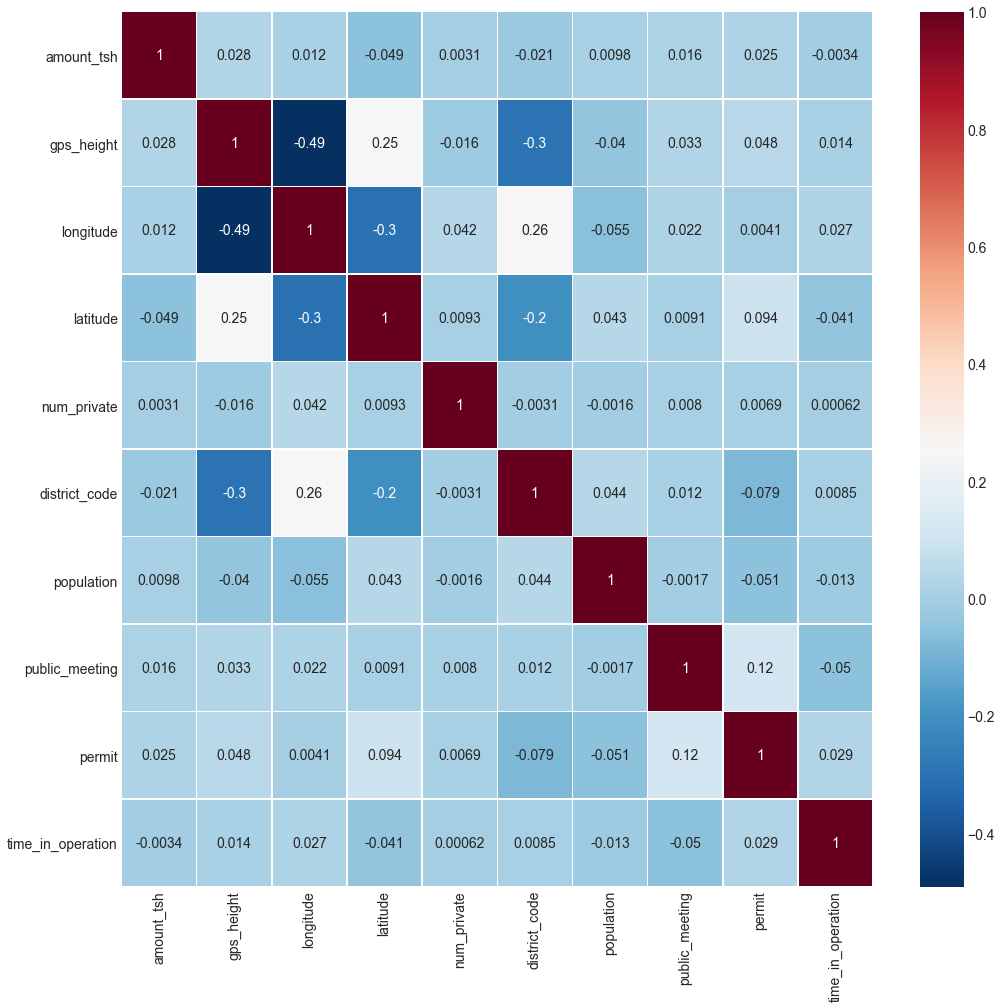

In [38]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(train.corr(), annot=True, linewidths=.5, cmap="RdBu_r")

### Baseline model: DummyClassifier

For having a baseline as a lowest benchmark which will be used to compare my models I will start with a dummy classifier. This basic classifier just predicts the most frequent class for all instances which will be feeded into the model. Therefore the accuracy of this classifier is defined by the percentage of the most frequent class. In this case the most frequent class is the 'functional' class. Around 54% of the instances are within this class so the Dummy Classifier provides an accuracy of 0.54

In [16]:
dummy = DummyClassifier(strategy='most_frequent', random_state=0)
dummy.fit(X_train, y_train)
dummy.score(X_val, y_val)

0.5430976430976431

In [55]:
model_eval(dummy,X_train,X_val,y_train,y_val,'Dummy')

--
test  recall = 0.5430976430976431
train recall = 0.5430765993265994
--
test  precision = 0.2949550499382149
train precision = 0.2949321927361437
--
test  accuracy = 0.5430976430976431
train accuracy = 0.5430765993265994
--
                         precision    recall  f1-score   support

             functional       0.54      1.00      0.70      6452
functional needs repair       0.00      0.00      0.00       863
         non functional       0.00      0.00      0.00      4565

               accuracy                           0.54     11880
              macro avg       0.18      0.33      0.23     11880
           weighted avg       0.29      0.54      0.38     11880



### Overview of different models

In [20]:
clf = [LogisticRegression(solver="lbfgs"),
       KNeighborsClassifier(n_neighbors=7,weights='distance'),
       SVC(),
       DecisionTreeClassifier(random_state=RSEED),
       RandomForestClassifier(n_estimators=1000, criterion="gini",min_samples_split=10),
       ExtraTreesClassifier(random_state=RSEED, n_estimators=500, max_depth=10),
       AdaBoostClassifier(random_state=RSEED),
       GradientBoostingClassifier(random_state=RSEED),
       XGBClassifier()]

In [21]:
for model in clf:
    model_name = model.__class__.__name__
    print(model_name)
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', model)])
    clf.fit(X_train, y_train)
    model_eval(clf,X_train,X_val,y_train,y_val,model_name)
print(compare_mod)   

LogisticRegression
--
test  recall = 0.748989898989899
train recall = 0.7531986531986532
--
test  precision = 0.7366701971668332
train precision = 0.7462745777903068
--
test  accuracy = 0.748989898989899
train accuracy = 0.7531986531986532
--
                         precision    recall  f1-score   support

             functional       0.73      0.90      0.81      6452
functional needs repair       0.45      0.10      0.17       863
         non functional       0.79      0.66      0.72      4565

               accuracy                           0.75     11880
              macro avg       0.66      0.55      0.57     11880
           weighted avg       0.74      0.75      0.73     11880

KNeighborsClassifier
--
test  recall = 0.7753367003367003
train recall = 0.9980850168350168
--
test  precision = 0.7670208027208377
train precision = 0.9980851199296356
--
test  accuracy = 0.7753367003367003
train accuracy = 0.9980850168350168
--
                         precision    recall  f1-sco

In [22]:
df_eval = compare_mod.T

In [23]:
df_eval.columns

Index(['test  recall', 'train recall', 'test  precision', 'train precision',
       'test  f1', 'train f1', 'test  fb=0.5', 'train fb=0.5',
       'test  accuracy', 'train accuracy'],
      dtype='object')

In [24]:
df_eval.drop(['test  fb=0.5','train fb=0.5'],1,inplace=True)

In [25]:
def plot_result(df):
    
    """
    Function for plotting the calculated metrics for each model to compare their performance.
    """
    
    plt.rcParams['font.size'] = 14
    
    labels = df.columns.tolist()
    models = df.index.tolist()
    
    fig, ax = plt.subplots(figsize=(14,14));
    x = np.arange(0, (len(models)+2)*len(labels), len(models)+2)
    width = 0.35

    for mod in models:        
        mod_list = []
        x += 1
        for l in labels:
            mod_list.append(df.loc[mod, l]) 
        
        rects1 = ax.bar(x - width/2, mod_list, width, label=mod, alpha=1)    
        ax.set_ylabel('score');
        ax.set_title('Results');
        ax.set_ylim(0,1);
        ax.set_xticks(x-len(models)/2)
        ax.set_xticklabels(labels);
        #ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=3, fancybox=True);
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

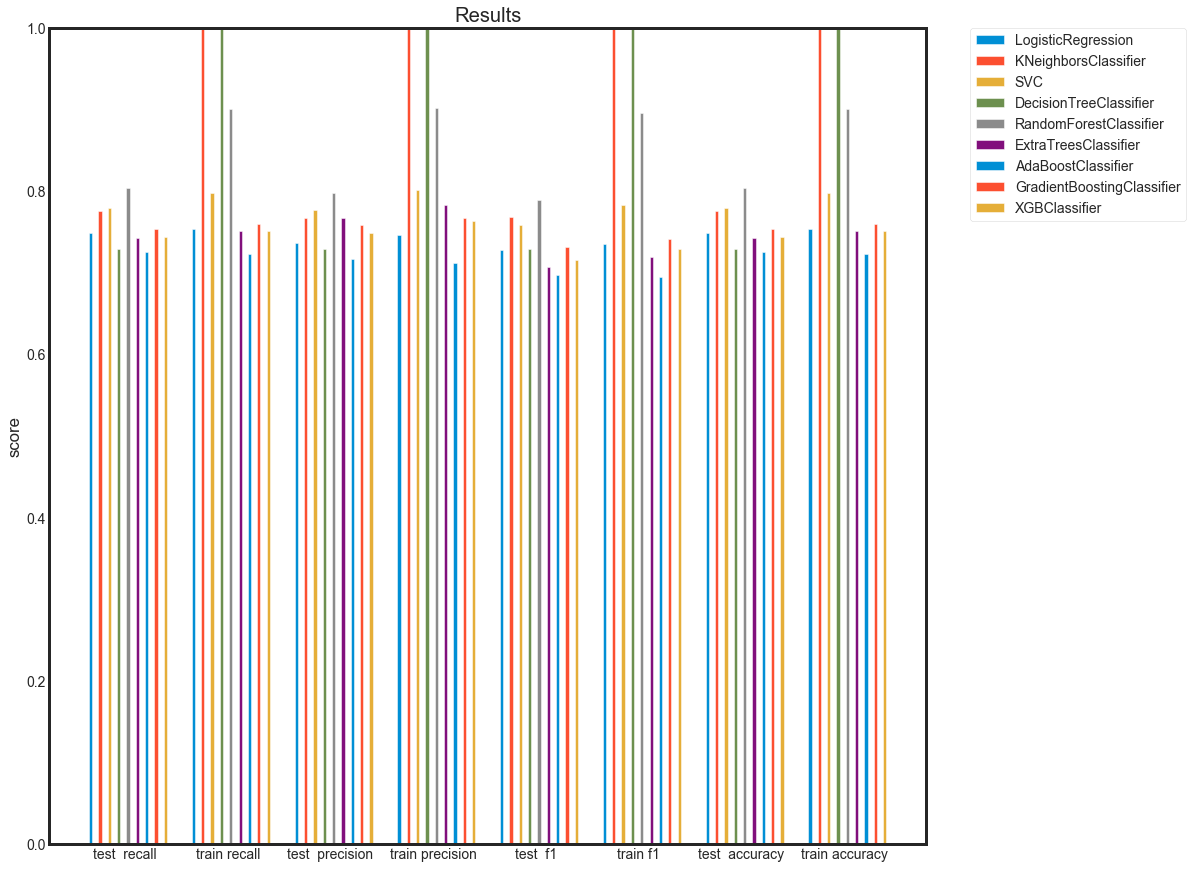

In [26]:
plot_result(df_eval)

In [27]:
df_eval

,test recall,train recall,test precision,train precision,test f1,train f1,test accuracy,train accuracy
LogisticRegression,0.748990,0.753199,0.736670,0.746275,0.728383,0.735729,0.748990,0.753199
KNeighborsClassifier,0.775337,0.998085,0.767021,0.998085,0.768534,0.998085,0.775337,0.998085
SVC,0.779798,0.798232,0.776736,0.800976,0.758578,0.782984,0.779798,0.798232
DecisionTreeClassifier,0.729630,0.998106,0.728586,0.998104,0.729044,0.998104,0.729630,0.998106
RandomForestClassifier,0.804040,0.900168,0.798070,0.901518,0.789352,0.895124,0.804040,0.900168
ExtraTreesClassifier,0.742929,0.751263,0.767480,0.782615,0.707602,0.719323,0.742929,0.751263
AdaBoostClassifier,0.725589,0.722685,0.717370,0.711877,0.697685,0.694460,0.725589,0.722685
GradientBoostingClassifier,0.754125,0.759806,0.758899,0.767574,0.731369,0.740852,0.754125,0.759806
XGBClassifier,0.743519,0.751284,0.748367,0.762928,0.715933,0.728583,0.743519,0.751284


### Logistics Regression

The first more sophisticated model will be a simple logistics regression, in this case executed directly with cross validation

In [82]:
reg = Pipeline(steps=[('preprocessor', preprocessor),
                      
                      ('classifier', LogisticRegressionCV(cv=5,random_state=RSEED))
                       
                      ])

In [70]:
reg.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [74]:
model_eval(reg,X_train,X_val,y_train,y_val,'Logistics_Regression_CV')

--
test  recall = 0.7490740740740741
train recall = 0.7536616161616162
--
test  precision = 0.7367413635715783
train precision = 0.7481479651709771
--
test  accuracy = 0.7490740740740741
train accuracy = 0.7536616161616162
--
                         precision    recall  f1-score   support

             functional       0.74      0.90      0.81      6452
functional needs repair       0.46      0.10      0.16       863
         non functional       0.79      0.67      0.72      4565

               accuracy                           0.75     11880
              macro avg       0.66      0.55      0.56     11880
           weighted avg       0.74      0.75      0.73     11880



In [75]:
y_train_pred = cross_val_predict(reg,X_train,y_train,cv=5)

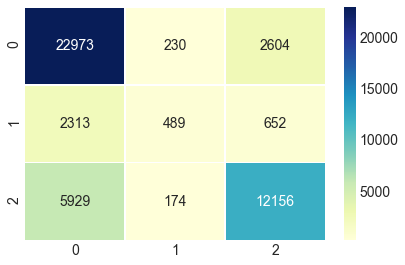

In [76]:
confusion = confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion, cmap="YlGnBu", annot=True, fmt='d', linewidths=.5);

#### with feature selection

In [48]:
k=125

In [44]:
reg_feat_select = Pipeline([
    ('preparation', preprocessor),
    ('feature_selection', TopFeatureSelector(importances, k)),
    ('classifier', LogisticRegressionCV(cv=5,random_state=RSEED))
                      ])    

reg_feat_select.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [42]:
model_eval(reg_feat_select,X_train,X_val,y_train,y_val,'LogReg_Feature_Selection')

--
test  recall = 0.7242424242424242
train recall = 0.7232954545454545
--
test  precision = 0.7138467313824068
train precision = 0.7185634733715098
--
test  accuracy = 0.7242424242424242
train accuracy = 0.7232954545454545
--
                         precision    recall  f1-score   support

             functional       0.70      0.91      0.79      6452
functional needs repair       0.43      0.02      0.03       863
         non functional       0.79      0.60      0.68      4565

               accuracy                           0.72     11880
              macro avg       0.64      0.51      0.50     11880
           weighted avg       0.71      0.72      0.69     11880



In [46]:
# param_grid = [{'feature_selection__k': list(range(125, len(importances) + 1,5))}]
# 
# grid_search_prep = GridSearchCV(reg_feat_select, param_grid, cv=5,
#                                 scoring='accuracy', verbose=10)
# grid_search_prep.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] feature_selection__k=125 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ feature_selection__k=125, score=0.742, total=  55.1s
[CV] feature_selection__k=125 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   55.0s remaining:    0.0s


[CV] ............ feature_selection__k=125, score=0.739, total=  55.7s
[CV] feature_selection__k=125 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.8min remaining:    0.0s


[CV] .............. feature_selection__k=125, score=nan, total=   0.2s
[CV] feature_selection__k=125 ........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.9min remaining:    0.0s


[CV] .............. feature_selection__k=125, score=nan, total=   0.3s
[CV] feature_selection__k=125 ........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.9min remaining:    0.0s


[CV] ............ feature_selection__k=125, score=0.742, total=  55.1s
[CV] feature_selection__k=130 ........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.8min remaining:    0.0s


[CV] ............ feature_selection__k=130, score=0.745, total=  55.0s
[CV] feature_selection__k=130 ........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.7min remaining:    0.0s


[CV] ............ feature_selection__k=130, score=0.743, total=  55.8s
[CV] feature_selection__k=130 ........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.6min remaining:    0.0s


[CV] .............. feature_selection__k=130, score=nan, total=   0.2s
[CV] feature_selection__k=130 ........................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  4.6min remaining:    0.0s


[CV] .............. feature_selection__k=130, score=nan, total=   0.2s
[CV] feature_selection__k=130 ........................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  4.6min remaining:    0.0s


[CV] ............ feature_selection__k=130, score=0.743, total= 1.0min
[CV] feature_selection__k=135 ........................................
[CV] ............ feature_selection__k=135, score=0.746, total=  59.0s
[CV] feature_selection__k=135 ........................................
[CV] ............ feature_selection__k=135, score=0.742, total=  54.3s
[CV] feature_selection__k=135 ........................................
[CV] .............. feature_selection__k=135, score=nan, total=   0.2s
[CV] feature_selection__k=135 ........................................
[CV] .............. feature_selection__k=135, score=nan, total=   0.2s
[CV] feature_selection__k=135 ........................................
[CV] ............ feature_selection__k=135, score=0.746, total=  54.4s
[CV] feature_selection__k=140 ........................................
[CV] ............ feature_selection__k=140, score=0.747, total=  55.5s
[CV] feature_selection__k=140 ........................................
[CV] .

[CV] .............. feature_selection__k=190, score=nan, total=   0.3s
[CV] feature_selection__k=190 ........................................
[CV] .............. feature_selection__k=190, score=nan, total=   0.2s
[CV] feature_selection__k=190 ........................................
[CV] ............ feature_selection__k=190, score=0.752, total=  55.9s
[CV] feature_selection__k=195 ........................................
[CV] ............ feature_selection__k=195, score=0.749, total=  56.0s
[CV] feature_selection__k=195 ........................................
[CV] ............ feature_selection__k=195, score=0.746, total=  56.3s
[CV] feature_selection__k=195 ........................................
[CV] .............. feature_selection__k=195, score=nan, total=   0.3s
[CV] feature_selection__k=195 ........................................
[CV] .............. feature_selection__k=195, score=nan, total=   0.2s
[CV] feature_selection__k=195 ........................................
[CV] .

[CV] ............ feature_selection__k=250, score=0.750, total=  47.7s
[CV] feature_selection__k=250 ........................................
[CV] ............ feature_selection__k=250, score=0.746, total=  47.8s
[CV] feature_selection__k=250 ........................................
[CV] .............. feature_selection__k=250, score=nan, total=   0.3s
[CV] feature_selection__k=250 ........................................
[CV] .............. feature_selection__k=250, score=nan, total=   0.2s
[CV] feature_selection__k=250 ........................................
[CV] ............ feature_selection__k=250, score=0.752, total=  55.5s
[CV] feature_selection__k=255 ........................................
[CV] ............ feature_selection__k=255, score=0.750, total=  55.0s
[CV] feature_selection__k=255 ........................................
[CV] ............ feature_selection__k=255, score=0.746, total=  55.2s
[CV] feature_selection__k=255 ........................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 77.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                     

In [47]:
grid_search_prep.best_params_

{'feature_selection__k': 125}

laut gridsearch ist die beste Feature anzahl 125

In [51]:
rfc_feat_select = Pipeline([
    ('preparation', preprocessor),
    ('feature_selection', TopFeatureSelector(importances, k)),
    ('classifier', RandomForestClassifier(n_estimators=1000, criterion="gini",min_samples_split=10))
                      ])    

rfc_feat_select.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [52]:
model_eval(rfc_feat_select,X_train,X_val,y_train,y_val,'RFC_Feat_Select')

--
test  recall = 0.8048821548821549
train recall = 0.9017887205387205
--
test  precision = 0.7990414562262648
train precision = 0.9030525988968345
--
test  accuracy = 0.8048821548821549
train accuracy = 0.9017887205387205
--
                         precision    recall  f1-score   support

             functional       0.79      0.91      0.85      6452
functional needs repair       0.63      0.21      0.31       863
         non functional       0.84      0.76      0.80      4565

               accuracy                           0.80     11880
              macro avg       0.75      0.63      0.65     11880
           weighted avg       0.80      0.80      0.79     11880



### Naive Bayes Classifier

Do not work with sparse matrix

### Random Forest

In [ ]:
n_estimators = 400,
min_samples_split = 2,
min_samples_leaf = 1,
max_features = 'sqrt',
max_depth = None,
bootstrap = False

In [ ]:
# randf_ = RandomForestClassifier(random_state=42)

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1,10,2)]
max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth
               }

In [34]:
clf_random_cv = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=42)
                               , param_distributions = random_grid
                               , n_iter = 10
                               , cv = 3
                               , verbose=10
                               , random_state=42
                               , n_jobs = -1)
# Fit the random search model
clf_random_cv.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 52.9min remaining:  5.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 56.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
print('Best score:', round(clf_random.best_score_,3))
print('Best model:', clf_random.best_params_)

In [ ]:
# joblib.dump(clf_random, "rfc_randomcv.pkl")

In [30]:
clf_random = joblib.load(MODEL_FOLDER + "rfc_randomcv.pkl")

In [36]:
print('Best score:', round(clf_random.best_score_,3))
print('Best model:', clf_random.best_params_)

NameError: name 'clf_random' is not defined

In [32]:
best_rfc = clf_random.best_params_

In [28]:
best_rfc_ = RandomForestClassifier(n_estimators=1800, 
                                   min_samples_split=10, 
                                   min_samples_leaf=1, 
                                   max_features='sqrt', 
                                   max_depth=30, 
                                   bootstrap=False)

In [29]:
best_rfc_.fit(X_train_transformed,y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [33]:
importances = best_rfc_.feature_importances_

In [33]:
X_val_transformed.shape

(11880, 255)

In [34]:
X_train_transformed.shape

(47520, 255)

In [38]:
# random_pred = clf_random.predict(X_val_transformed)
# print('Validation score: ',round(accuracy_score(y_val,random_pred),3))

In [39]:
model_eval(clf_random,X_train_transformed,X_val_transformed,y_train,y_val,'RFC')

In [ ]:
compare_mod.T*100

## AdaBoost

In [ ]:
ada_log=Pipeline([('pre',preprocessor), 
              ('model',AdaBoostClassifier(base_estimator=LogisticRegression(C=0.03),
                                      random_state=RSEED))])
ada_log.fit(X_train,y_train)

In [ ]:
model_eval(ada_log,X_train,X_val,y_train,y_val,'AdaBoost Log')

In [ ]:
ada_rfc=Pipeline([('pre',preprocessor), 
              ('model',AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1),
                                      random_state=RSEED))])
ada_rfc.fit(X_train,y_train)

In [ ]:
model_eval(ada_rfc,X_train,X_val,y_train,y_val,'AdaBoost RFC')

In [ ]:
ada_DCT=Pipeline([('pre',preprocessor), 
              ('model',AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                      random_state=RSEED))])
ada_DCT.fit(X_train,y_train)

In [ ]:
compare_mod.T

## Support Vector Classifier

## XGBoost

In [20]:
param_xgb = {"learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30] ,
             "max_depth": [5, 6, 8, 10, 12, 15, 17, 20],
             "min_child_weight": [1, 3, 5],
             "gamma": [0.0, 0.1, 0.2 , 0.3, 0.4 ],
             "colsample_bytree" : [0.4, 0.5 , 0.7 ] 
            }

xgb = XGBClassifier()

In [23]:
# First RandomSearch for XGBoost
random_xgb = RandomizedSearchCV(xgb, 
                                param_distributions = param_xgb,
                                n_iter = 50, cv = 3, scoring = 'accuracy', 
                                verbose = 10, random_state=RSEED, n_jobs = -1)

In [24]:
random_xgb.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   48.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  9.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [25]:
# Best accurary score 
print('best accuracy:', random_xgb.best_score_)

# Best parameter settings 
random_xgb.best_params_

best accuracy: 0.8026725589225588


{'min_child_weight': 1,
 'max_depth': 20,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [26]:
model_eval(random_xgb,X_train_transformed,X_val_transformed,y_train,y_val,'XGBoost_Random')

--
test  recall = 0.8076599326599326
train recall = 0.9602693602693603
--
test  precision = 0.8009537011881787
train precision = 0.9610336100836806
--
test  accuracy = 0.8076599326599326
train accuracy = 0.9602693602693603
--
                         precision    recall  f1-score   support

             functional       0.79      0.91      0.85      6452
functional needs repair       0.61      0.22      0.32       863
         non functional       0.85      0.77      0.81      4565

               accuracy                           0.81     11880
              macro avg       0.75      0.63      0.66     11880
           weighted avg       0.80      0.81      0.79     11880



In [32]:
plt.figure(figsize=(20,15))
plot_importance(random_xgb, ax=plt.gca())

NameError: name 'random_xgb' is not defined

<Figure size 1440x1080 with 0 Axes>

## Neural Network: Multilayer Perceptron Classifier

In [14]:
from sklearn.neural_network import MLPClassifier

In [26]:
snn_classifier = MLPClassifier()
snn_classifier.fit(X_train_transformed, y_train)
#snn_predictions = snn_classifier.predict(training_inputs)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [29]:
model_eval(snn_classifier,X_train_transformed,X_val_transformed, y_train,y_val,'SNN_MLP')

--
test  recall = 0.7739057239057239
train recall = 0.8652146464646465
--
test  precision = 0.7656823736849747
train precision = 0.8644688851361246
--
test  accuracy = 0.7739057239057239
train accuracy = 0.8652146464646465
--
                         precision    recall  f1-score   support

             functional       0.79      0.86      0.82      6452
functional needs repair       0.41      0.28      0.33       863
         non functional       0.80      0.74      0.77      4565

               accuracy                           0.77     11880
              macro avg       0.67      0.63      0.64     11880
           weighted avg       0.77      0.77      0.77     11880



In [23]:
# dnn_classifier = MLPClassifier(hidden_layer_sizes = [125]*3)
# dnn_classifier = MLPClassifier(hidden_layer_sizes=(15,), random_state=42, max_iter=1, warm_start=True)
dnn_classifier = MLPClassifier(hidden_layer_sizes=(150,150,150,150,150),random_state=42,max_iter=500)
dnn_classifier.fit(X_train_transformed, y_train)
model_eval(dnn_classifier,X_train_transformed,X_val_transformed, y_train,y_val,'DNN_MLP')

--
test  recall = 0.7693602693602694
train recall = 0.9056607744107744
--
test  precision = 0.7614163568847562
train precision = 0.9053384775839667
--
test  accuracy = 0.7693602693602694
train accuracy = 0.9056607744107744
--
                         precision    recall  f1-score   support

             functional       0.79      0.84      0.82      6452
functional needs repair       0.39      0.29      0.33       863
         non functional       0.78      0.76      0.77      4565

               accuracy                           0.77     11880
              macro avg       0.66      0.63      0.64     11880
           weighted avg       0.76      0.77      0.76     11880



In [25]:
parameters = {'solver': ['lbfgs','adam'],
              'max_iter': [10,100,1000,1250,1500, 1750, 2000], 
              'alpha': 10.0 ** -np.arange(1, 10), 
              'hidden_layer_sizes':np.arange(10, 15)}
clf = RandomizedSearchCV(MLPClassifier(random_state=42), parameters, n_jobs=-1)

clf.fit(X_train_transformed, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           ran...
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,


In [26]:
model_eval(clf,X_train_transformed,X_val_transformed,y_train,y_val,'MLP_RandomSearch')

--
test  recall = 0.7763468013468013
train recall = 0.7906986531986532
--
test  precision = 0.7668382310307768
train precision = 0.788266515136355
--
test  accuracy = 0.7763468013468013
train accuracy = 0.7906986531986532
--
                         precision    recall  f1-score   support

             functional       0.76      0.90      0.83      6452
functional needs repair       0.49      0.17      0.25       863
         non functional       0.83      0.71      0.76      4565

               accuracy                           0.78     11880
              macro avg       0.69      0.59      0.61     11880
           weighted avg       0.77      0.78      0.76     11880



## How about imbalanced data

In [ ]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE()
# resampled_training_inputs, resampled_training_outputs_labels = sm.fit_resample(training_inputs, training_outputs_labels)

## Playing with learning curves

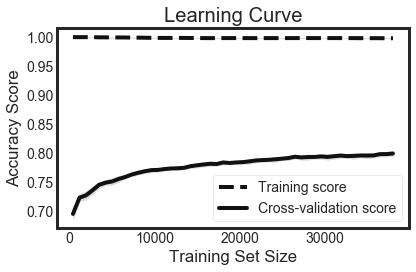

In [27]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        X_train_transformed, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=5,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Appendix

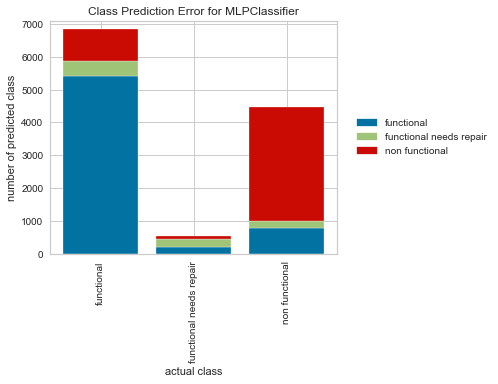

In [34]:
from yellowbrick.classifier import ClassPredictionError

classes = ["functional", "functional needs repair", "non functional"]
visualizer = ClassPredictionError(MLPClassifier(), classes=classes)

# Fit the training data to the visualizer
visualizer.fit(X_train_transformed, y_train)

# Evaluate the model on the test data
visualizer.score(X_val_transformed, y_val)

# Draw visualization
visualizer.show()

## Preparing Submission

In [47]:
submission = pd.read_pickle(DATA_FOLDER+'test_featured_clean.pkl')

In [30]:
id_predicted = random_xgb.predict(X_val_transformed)

In [31]:
xgb_pred_label = pd.Series(id_predicted)

In [36]:
xgb_pred_label.value_counts(normalize=True)

functional                 0.624074
non functional             0.349411
functional needs repair    0.026515
dtype: float64

In [49]:
#submission.drop(to_drop,1, inplace=True)
submission_trans = preprocessor.transform(submission.drop(to_drop,1))

In [50]:
sub_pred = random_xgb.predict(submission_trans)

In [52]:
competition = pd.DataFrame({'id':submission.id,'status_group':sub_pred.astype(str)})

In [32]:
competition.head(25)

NameError: name 'competition' is not defined

In [55]:
competition.to_csv(DATA_FOLDER+'Submission_1.csv',index=False)